# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

#### importing machine learning libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import os

#### importing library to fetch data from twitter

In [2]:
# load tweets into a dataframe
df18 = pd.read_json(os.path.join('condensed_2018.json'))
df17 = pd.read_json(os.path.join('condensed_2017.json'))
read_stock_p = pd.read_csv(os.path.join('dow.csv'))
frames = [df18, df17]

result = pd.concat(frames)
# Reset index
result = result.reset_index(drop=True)

result

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False
...,...,...,...,...,...,...,...,...
6110,Twitter for iPhone,815449868739211264,RT @DonaldJTrumpJr: Happy new year everyone. #...,2017-01-01 06:49:33+00:00,6847,NaN,0,True
6111,Twitter for iPhone,815433444591304704,RT @EricTrump: 2016 was such an incredible yea...,2017-01-01 05:44:17+00:00,6941,NaN,0,True
6112,Twitter for iPhone,815433217595547648,RT @Reince: Happy New Year + God's blessings t...,2017-01-01 05:43:23+00:00,7144,NaN,0,True
6113,Twitter for iPhone,815432169464197120,RT @DanScavino: On behalf of our next #POTUS &...,2017-01-01 05:39:13+00:00,5548,NaN,0,True


In [3]:
# drop retweets
result = result[~result.text.str.startswith('RT')]

In [4]:

result = result.reset_index(drop=True)

In [5]:
result = result.rename(columns={"text": "Tweets"})

In [6]:
result

,source,id_str,Tweets,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False
...,...,...,...,...,...,...,...,...
5336,Twitter for Android,815990335318982656,Various media outlets and pundits say that I t...,2017-01-02 18:37:10+00:00,9057,NaN,47285,False
5337,Twitter for Android,815989154555297792,"@CNN just released a book called ""Unprecedente...",2017-01-02 18:32:29+00:00,3948,759251.0,13862,False
5338,Twitter for Android,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 17:31:17+00:00,17411,NaN,63340,False
5339,Twitter for Android,815930688889352192,"Well, the New Year begins. We will, together, ...",2017-01-02 14:40:10+00:00,29248,NaN,124024,False


In [7]:
df = result['created_at'].apply(lambda x: x.date)

In [8]:
result["Date"] = df

In [9]:
result

,source,id_str,Tweets,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,Date
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False,2018-12-31
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False,2018-12-31
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False,2018-12-31
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False,2018-12-31
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False,2018-12-31
...,...,...,...,...,...,...,...,...,...
5336,Twitter for Android,815990335318982656,Various media outlets and pundits say that I t...,2017-01-02 18:37:10+00:00,9057,NaN,47285,False,2017-01-02
5337,Twitter for Android,815989154555297792,"@CNN just released a book called ""Unprecedente...",2017-01-02 18:32:29+00:00,3948,759251.0,13862,False,2017-01-02
5338,Twitter for Android,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 17:31:17+00:00,17411,NaN,63340,False,2017-01-02
5339,Twitter for Android,815930688889352192,"Well, the New Year begins. We will, together, ...",2017-01-02 14:40:10+00:00,29248,NaN,124024,False,2017-01-02


In [10]:
import re
result['Tweets'] = result['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [11]:
result

,source,id_str,Tweets,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,Date
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR!,2018-12-31 23:53:06+00:00,33548,NaN,136012,False,2018-12-31
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False,2018-12-31
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False,2018-12-31
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False,2018-12-31
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False,2018-12-31
...,...,...,...,...,...,...,...,...,...
5336,Twitter for Android,815990335318982656,Various media outlets and pundits say that I t...,2017-01-02 18:37:10+00:00,9057,NaN,47285,False,2017-01-02
5337,Twitter for Android,815989154555297792,"@CNN just released a book called ""Unprecedente...",2017-01-02 18:32:29+00:00,3948,759251.0,13862,False,2017-01-02
5338,Twitter for Android,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 17:31:17+00:00,17411,NaN,63340,False,2017-01-02
5339,Twitter for Android,815930688889352192,"Well, the New Year begins. We will, together, ...",2017-01-02 14:40:10+00:00,29248,NaN,124024,False,2017-01-02


In [12]:

data = result.filter(['Date', 'Tweets'])


#### Removing special character from each tweets

In [13]:
# data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.set_value(index,'Date',row["Date"])
    cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
#print(cdata.dtypes)

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [14]:
cdata

,Date,Tweets
0,2018-12-31,HAPPY NEW YEAR
1,2018-12-31,Senator Schumer more than a year longer than a...
2,2018-12-31,Heads of countries are calling wanting to know...
3,2018-12-31,Its incredible how Democrats can all use their...
4,2018-12-31,Im in the Oval Office Democrats come back from...
...,...,...
5336,2017-01-02,Various media outlets and pundits say that I t...
5337,2017-01-02,CNN just released a book called Unprecedented ...
5338,2017-01-02,Chicago murder rate is record setting 4331 sh...
5339,2017-01-02,Well the New Year begins We will together MAKE...


#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

#### Creating a dataframe where we will combine the tweets date wise and store into

In [15]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [16]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


#### All the tweets has been clubbed as per their date.

In [17]:
ccdata

,Date,Tweets
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...
1,2018-12-30,President and Mrs Obama builthas a ten foot W...
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...
3,2018-12-28,Thank you to Sean Parnell for the nice commen...
4,2018-12-27,CNN amp others within the Fake News Universe ...
...,...,...
706,2017-01-06,Monitoring the terrible situation in Florida ...
707,2017-01-05,Toyota Motor said will build a new plant in B...
708,2017-01-04,Jackie Evanchos album sales have skyrocketed ...
709,2017-01-03,I will be having a general news conference on...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [18]:

read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,19872.859375,19938.529297,19775.929688,19881.759766,19881.759766,339180000
1,2017-01-04,19890.939453,19956.140625,19878.830078,19942.160156,19942.160156,280010000
2,2017-01-05,19924.560547,19948.599609,19811.119141,19899.289063,19899.289063,269920000
3,2017-01-06,19906.960938,19999.630859,19834.080078,19963.800781,19963.800781,277700000
4,2017-01-09,19931.410156,19943.779297,19887.380859,19887.380859,19887.380859,287510000
...,...,...,...,...,...,...,...
496,2018-12-21,22871.740234,23254.589844,22396.339844,22445.369141,22445.369141,900510000
497,2018-12-24,22317.279297,22339.869141,21792.199219,21792.199219,21792.199219,308420000
498,2018-12-26,21857.730469,22878.919922,21712.529297,22878.449219,22878.449219,433080000
499,2018-12-27,22629.060547,23138.890625,22267.419922,23138.820313,23138.820313,407940000


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [19]:
ccdata['Prices']=""

In [20]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [21]:
ccdata

,Date,Tweets,Prices
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138
...,...,...,...
706,2017-01-06,Monitoring the terrible situation in Florida ...,19963
707,2017-01-05,Toyota Motor said will build a new plant in B...,19899
708,2017-01-04,Jackie Evanchos album sales have skyrocketed ...,19942
709,2017-01-03,I will be having a general news conference on...,19881


#### So we take the mean for the close price and put it in the blank value

In [22]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [23]:
ccdata

,Date,Tweets,Prices
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,23381
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,23381
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,23381
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138
...,...,...,...
706,2017-01-06,Monitoring the terrible situation in Florida ...,19963
707,2017-01-05,Toyota Motor said will build a new plant in B...,19899
708,2017-01-04,Jackie Evanchos album sales have skyrocketed ...,19942
709,2017-01-03,I will be having a general news conference on...,19881


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [24]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [25]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,23381,,,,
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,23381,,,,
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,23381,,,,
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062,,,,
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138,,,,
...,...,...,...,...,...,...,...
706,2017-01-06,Monitoring the terrible situation in Florida ...,19963,,,,
707,2017-01-05,Toyota Motor said will build a new plant in B...,19899,,,,
708,2017-01-04,Jackie Evanchos album sales have skyrocketed ...,19942,,,,
709,2017-01-03,I will be having a general news conference on...,19881,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Ed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [28]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,23381,-0.9391,0.139,0.745,0.116
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,23381,0.9835,0.09,0.644,0.266
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,23381,0.3644,0.105,0.786,0.11
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062,-0.3262,0.089,0.829,0.082
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138,-0.9813,0.133,0.779,0.088
...,...,...,...,...,...,...,...
706,2017-01-06,Monitoring the terrible situation in Florida ...,19963,0.9876,0.061,0.767,0.171
707,2017-01-05,Toyota Motor said will build a new plant in B...,19899,0.4151,0.116,0.749,0.135
708,2017-01-04,Jackie Evanchos album sales have skyrocketed ...,19942,-0.9513,0.145,0.78,0.075
709,2017-01-03,I will be having a general news conference on...,19881,0.6747,0.114,0.743,0.142


In [47]:
#  ccdata.to_csv(ccdata.csv, sep='/,')
export_csv = ccdata.to_csv (r'\Users\Edward Doris\Desktop\project3\ccdata.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  69.76090014064698
% of negative tweets=  24.613220815752463


[]

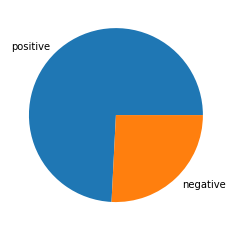

In [29]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [30]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [31]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2018-12-31,23381,-0.9391,0.139,0.745,0.116
1,2018-12-30,23381,0.9835,0.09,0.644,0.266
2,2018-12-29,23381,0.3644,0.105,0.786,0.11
3,2018-12-28,23062,-0.3262,0.089,0.829,0.082
4,2018-12-27,23138,-0.9813,0.133,0.779,0.088
...,...,...,...,...,...,...
706,2017-01-06,19963,0.9876,0.061,0.767,0.171
707,2017-01-05,19899,0.4151,0.116,0.749,0.135
708,2017-01-04,19942,-0.9513,0.145,0.78,0.075
709,2017-01-03,19881,0.6747,0.114,0.743,0.142


#### Dividing the dataset into train and test.

In [32]:
train_start_index = '0'
train_end_index = '142'
test_start_index = '143'
test_end_index = '710'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [33]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [34]:
print(numpy_df_train)

[[0.139 0.116]
 [0.09  0.266]
 [0.105 0.11 ]
 [0.089 0.082]
 [0.133 0.088]
 [0.    0.   ]
 [0.053 0.345]
 [0.077 0.149]
 [0.125 0.158]
 [0.133 0.156]
 [0.097 0.169]
 [0.113 0.15 ]
 [0.112 0.176]
 [0.138 0.172]
 [0.011 0.233]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [35]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [36]:
print(numpy_df_test)

[[0.172 0.078]
 [0.133 0.164]
 [0.037 0.22 ]
 ...
 [0.145 0.075]
 [0.114 0.142]
 [0.207 0.132]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [37]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

    Prices
0    23381
1    23381
2    23381
3    23062
4    23138
5    22878
6    23381
7    21792
8    23381
9    23381
10   22445
11   22859
12   23323
13   23675
14   23592


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [38]:
pip install treeinterpreter


Traceback (most recent call last):
  File "/Users/Ed/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Ed/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Ed/anaconda3/lib/python3.7/site-packages/pip/__main__.py", line 16, in <module>
    from pip._internal import main as _main  # isort:skip # noqa
  File "/Users/Ed/anaconda3/lib/python3.7/site-packages/pip/_internal/__init__.py", line 40, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/Ed/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 8, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/Ed/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/main_parser.py", line 11, in <module>
    from pip._internal.commands import (
  File "/Users/Ed/anaconda3/lib/python3.7/site-packages/pip/_internal/commands/__init__.py"

In [51]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

NameError: name 'RandomForestRegressor' is not defined

#### Making Predictions

In [ ]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [ ]:
print(prediction)

#### Importing matplotlib library for plotting graph

In [ ]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [ ]:
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [ ]:
predictions_df_

#### Plotting the graph for the Predicted_price VS Actual Price

In [52]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

NameError: name 'predictions_df_' is not defined

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

In [ ]:
reg.predict(numpy_df_test)

### NOTE: Since our dataset is very small and as you can see that fetching 600 tweets could only make data for just 10 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


### Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [ ]:
stocks_dataf = pd.read_pickle('C:\\Users\\anubh\\OneDrive\\Desktop\\Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

## New dataset

In [ ]:
stocks_dataf

#### Removing dot (.) and space from the Tweets

In [ ]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [ ]:
dataframe = stocks_dataf[['adj_close_price']].copy()

In [ ]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in stocks_dataf.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
dataframe

In [ ]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.ix[train_data_start : train_data_end]
test = dataframe.ix[test_data_start:test_data_end]

In [ ]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [ ]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [ ]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
"""Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
The ith element represents the number of Neutralrons in the ith
hidden layer."""
mlpc.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = mlpc.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] +4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

In [ ]:
print(mlpc.score(numpy_dataframe_train, train['adj_close_price']))
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))

In [ ]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

In [ ]:
from treeinterpreter import treeinterpreter as tree_interpreter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])

    prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_test)
    prediction_list.append(prediction)
    #print("ACCURACY= ",rf.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']
    #predictions_dataframe_list.plot()
    #predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    #predictions_dataframe_list_average.plot()
prediction = rf.predict(numpy_dataframe_train)
#print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
#stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
predictions_dataframe1.plot(color=['orange','green'])
print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
"""predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')"""

## Hence we are achieving the accuracy of 91.96 % using RANDOM FOREST REGRESSOR